# CNN

Convolutional Neural Network - A deep learning architechture that is primarily used for image recognition and analysis tasks. Currently one of the most popular model amongst image classification problems nowadays.

A CNN typically consists of multiple layers of specialized neurons that perform different tasks, including convolutional layers, pooling layers, and fully connected layers, that change the size and dimensions of the data along the process, in order to get the features out of an image and classify it into a single vector.

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
import cv2
import random
import os
from tensorflow.keras import layers
%matplotlib inline

In [3]:
downscaling = 2

Conv2D, MaxPooling, Flatten and Dense are important building blocks in the CNN model.

Conv2D - performs convolution on the image, using a kernal or filter.

MaxPooling - this, as opposed to Conv2D, reduces the size of the features, by deviding the feature map by taking the maximum value in each region (the regions are devided by the value inserted into the MaxPooling layer)

Flatten - takes the output of a convolutional or pooling layer and converts it into a one-dimensional vector. This is necessary because the next layer in the network, which is typically a dense or fully connected layer, requires a one-dimensional input.

Dense (also known as a fully connected layer) - a type of layer in a neural network that performs classification or regression by taking the flattened input from the previous layer and computing a weighted sum of the inputs, followed by the application of an activation function.

In [3]:
cnn = tf.keras.models.Sequential()

cnn.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=(int(384/downscaling), int(512/downscaling), 3)))
cnn.add(layers.MaxPooling2D((2, 2)))
cnn.add(layers.Conv2D(64, (3, 3), activation='relu'))
cnn.add(layers.MaxPooling2D((2, 2)))
cnn.add(layers.Conv2D(64, (3, 3), activation='relu'))
cnn.add(layers.MaxPooling2D((2, 2)))

cnn.add(layers.Flatten())

cnn.add(layers.Dense(64, activation='relu'))
cnn.add(layers.Dense(6))

cnn.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 190, 254, 32)      896       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 95, 127, 32)      0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 93, 125, 64)       18496     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 46, 62, 64)       0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 44, 60, 64)        36928     
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 22, 30, 64)       0

In [4]:
cnn.compile(optimizer='adam', loss='mse', metrics=['accuracy'])

In [4]:
def generate_data(data_path, grayscale=False, downscale=None):
    cardboard, glass, metal, paper, plastic, trash = [], [], [], [], [], []
    for root, _, files in os.walk(data_path):
        for file in files:
            if ".jpg" in file:

                if grayscale:
                    img = cv2.cvtColor(cv2.imread(os.path.join(root, file)), cv2.COLOR_BGR2GRAY)
                else:
                    img = cv2.cvtColor(cv2.imread(os.path.join(root, file)), cv2.COLOR_BGR2RGB)
                
                if downscale:
                    new_size = (int(img.shape[1]/downscale), int(img.shape[0]/downscale))
                    img = cv2.resize(img, new_size)

                if "cardboard" in file: cardboard.append(img)
                elif "glass" in file: glass.append(img)
                elif "metal" in file: metal.append(img)
                elif "paper" in file: paper.append(img)
                elif "plastic" in file: plastic.append(img)
                elif "trash" in file: trash.append(img)
                else: print(f"Unable to classify image: {file}")
    images = {"cardboard": np.array(cardboard), "glass": np.array(glass), "metal": np.array(metal),
              "paper": np.array(paper), "plastic": np.array(plastic), "trash": np.array(trash)}
    return images

def label2vec(label):
    vec = [0.0, 0.0, 0.0, 0.0, 0.0, 0.0]
    vec[label] = 1.0
    return np.array(vec)

labels = {"cardboard": 0, "glass": 1, "metal": 2, "paper": 3, "plastic": 4, "trash": 5}

def train_test_split(images, train_size=0.8):
    data = []
    for key, value in images.items():
        for img in value: 
            data.append([img, labels[key]])
    
    random.shuffle(data)
    train_size = int(len(data) * train_size)

    X_train = np.array([e[0] for e in data[:train_size]])
    y_train = np.array([label2vec(e[1]) for e in data[:train_size]])

    X_test = np.array([e[0] for e in data[train_size:]])
    y_test = np.array([label2vec(e[1]) for e in data[train_size:]])

    return X_train/255, y_train, X_test/255, y_test

In [5]:
def show_sample(X, y):
    fig = plt.figure(figsize=(10, 7))
    rows, columns = 1, 6
    for i in range(6):
        for j in range(len(X)):
            if y[j][i] == 1:
                fig.add_subplot(rows, columns, i+1)
                plt.imshow(X[j])
                plt.axis('off')
                plt.title(str(y[j]))
                break

Here, we translate the labels into vectors, where the index of the vector indicates the class.

In [7]:
original_images = generate_data("data", downscale=downscaling)
X_train, y_train, X_test, y_test = train_test_split(original_images, train_size=0.9)

print(f"X_train: {X_train.shape}\ny_train: {y_train.shape}\nX_Test: {X_test.shape}\ny_test: {y_test.shape}")

X_train: (2274, 192, 256, 3)
y_train: (2274, 6)
X_Test: (253, 192, 256, 3)
y_test: (253, 6)


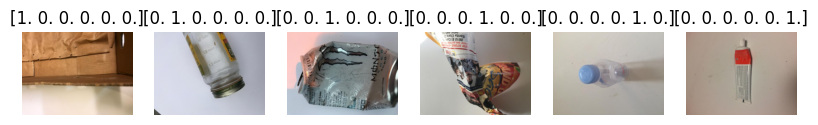

In [8]:
show_sample(X_train, y_train)

We will measure the amount of time training takes.

In [6]:
import time

In [10]:
start = time.time()

history = cnn.fit(X_train, y_train, epochs=10, validation_data=(X_test, y_test))

print(f"Time: {time.time() - start} seconds")

Epoch 1/10
72/72 [==============================] - 89s 1s/step - loss: 0.1811 - accuracy: 0.3500 - val_loss: 0.1302 - val_accuracy: 0.3083
Epoch 2/10
72/72 [==============================] - 84s 1s/step - loss: 0.1134 - accuracy: 0.4815 - val_loss: 0.1819 - val_accuracy: 0.2688
Epoch 3/10
72/72 [==============================] - 84s 1s/step - loss: 0.1121 - accuracy: 0.4934 - val_loss: 0.1052 - val_accuracy: 0.5178
Epoch 4/10
72/72 [==============================] - 80s 1s/step - loss: 0.0974 - accuracy: 0.5818 - val_loss: 0.1054 - val_accuracy: 0.5494
Epoch 5/10
72/72 [==============================] - 80s 1s/step - loss: 0.0867 - accuracy: 0.6653 - val_loss: 0.1078 - val_accuracy: 0.5020
Epoch 6/10
72/72 [==============================] - 79s 1s/step - loss: 0.0776 - accuracy: 0.7177 - val_loss: 0.1118 - val_accuracy: 0.5296
Epoch 7/10
72/72 [==============================] - 79s 1s/step - loss: 0.0730 - accuracy: 0.7643 - val_loss: 0.1043 - val_accuracy: 0.5652
Epoch 8/10
72/72 [==

8/8 - 2s - loss: 0.1087 - accuracy: 0.5810 - 2s/epoch - 286ms/step


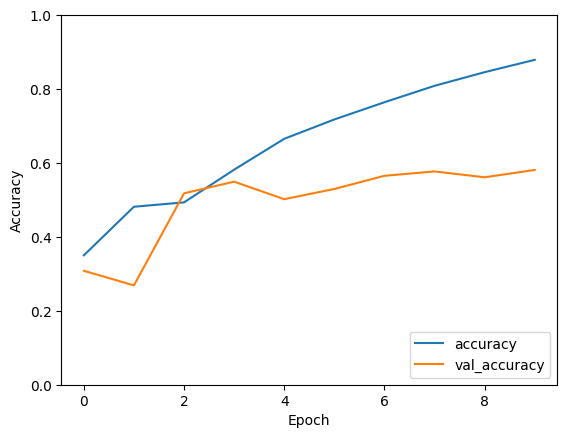

In [11]:
plt.plot(history.history['accuracy'], label='accuracy')
plt.plot(history.history['val_accuracy'], label = 'val_accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.ylim([0, 1])
plt.legend(loc='lower right')

test_loss, test_acc = cnn.evaluate(X_test, y_test, verbose=2)

Good training score, but low testing score.

This could be improved in a few ways, mainly adding more layers, changing the learning rate, and adding normalization.

trying to add more layers

In [12]:
cnn_more_layers = tf.keras.models.Sequential()

cnn_more_layers.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=(int(384/downscaling), int(512/downscaling), 3)))
cnn_more_layers.add(layers.MaxPooling2D((2, 2)))
cnn_more_layers.add(layers.Conv2D(64, (3, 3), activation='relu'))
cnn_more_layers.add(layers.MaxPooling2D((2, 2)))
cnn_more_layers.add(layers.Conv2D(128, (3, 3), activation='relu'))
cnn_more_layers.add(layers.MaxPooling2D((2, 2)))
cnn_more_layers.add(layers.Conv2D(256, (3, 3), activation='relu'))
cnn_more_layers.add(layers.MaxPooling2D((2, 2)))

cnn_more_layers.add(layers.Flatten())

cnn_more_layers.add(layers.Dense(256, activation='relu'))
cnn_more_layers.add(layers.Dense(6))

cnn_more_layers.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_3 (Conv2D)           (None, 190, 254, 32)      896       
                                                                 
 max_pooling2d_3 (MaxPooling  (None, 95, 127, 32)      0         
 2D)                                                             
                                                                 
 conv2d_4 (Conv2D)           (None, 93, 125, 64)       18496     
                                                                 
 max_pooling2d_4 (MaxPooling  (None, 46, 62, 64)       0         
 2D)                                                             
                                                                 
 conv2d_5 (Conv2D)           (None, 44, 60, 128)       73856     
                                                                 
 max_pooling2d_5 (MaxPooling  (None, 22, 30, 128)     

In [13]:
cnn_more_layers.compile(optimizer='adam', loss='mse', metrics=['accuracy'])

In [14]:
start = time.time()

history_more_layers = cnn_more_layers.fit(X_train, y_train, epochs=10, validation_data=(X_test, y_test))

print(f"Time: {time.time() - start} seconds")

Epoch 1/10
72/72 [==============================] - 114s 2s/step - loss: 0.2239 - accuracy: 0.2929 - val_loss: 0.1182 - val_accuracy: 0.4308
Epoch 2/10
72/72 [==============================] - 111s 2s/step - loss: 0.1154 - accuracy: 0.4481 - val_loss: 0.1376 - val_accuracy: 0.3597
Epoch 3/10
72/72 [==============================] - 110s 2s/step - loss: 0.1026 - accuracy: 0.5330 - val_loss: 0.1279 - val_accuracy: 0.4032
Epoch 4/10
72/72 [==============================] - 110s 2s/step - loss: 0.0989 - accuracy: 0.5488 - val_loss: 0.1153 - val_accuracy: 0.5020
Epoch 5/10
72/72 [==============================] - 111s 2s/step - loss: 0.0928 - accuracy: 0.6099 - val_loss: 0.0987 - val_accuracy: 0.5652
Epoch 6/10
72/72 [==============================] - 110s 2s/step - loss: 0.0809 - accuracy: 0.6741 - val_loss: 0.0980 - val_accuracy: 0.5771
Epoch 7/10
72/72 [==============================] - 109s 2s/step - loss: 0.0710 - accuracy: 0.7247 - val_loss: 0.0995 - val_accuracy: 0.5771
Epoch 8/10
72

8/8 - 3s - loss: 0.0905 - accuracy: 0.5889 - 3s/epoch - 426ms/step


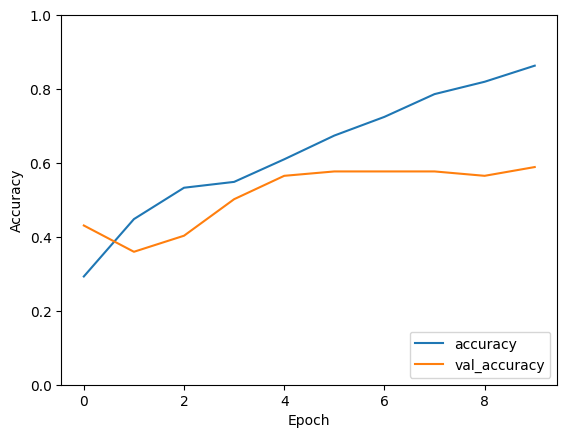

In [15]:
plt.plot(history_more_layers.history['accuracy'], label='accuracy')
plt.plot(history_more_layers.history['val_accuracy'], label = 'val_accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.ylim([0, 1])
plt.legend(loc='lower right')

test_loss_more_layers, test_acc_more_layers = cnn_more_layers.evaluate(X_test, y_test, verbose=2)

Reaching an accuracy of 70%

#### Adding Normalization Layers

In [11]:
normalization_downscaling = 8

normalization_images = generate_data("data", downscale=normalization_downscaling)
X_train, y_train, X_test, y_test = train_test_split(normalization_images, train_size=0.9)

print(f"X_train: {X_train.shape}\ny_train: {y_train.shape}\nX_Test: {X_test.shape}\ny_test: {y_test.shape}")

X_train: (2274, 48, 64, 3)
y_train: (2274, 6)
X_Test: (253, 48, 64, 3)
y_test: (253, 6)


Dropout - a regularization technique used to prevent overfitting. It works by randomly dropping out (setting to zero) some of the output values of a layer during training.

BatchNormalization - a technique used to improve the performance and stability of neural networks. It works by subtracting the mean and dividing by the standard deviation of the inputs in a mini-batch, thus normalizing the inputs to a layer.

In [12]:
cnn_normalization = tf.keras.models.Sequential()

cnn_normalization.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=(int(384/normalization_downscaling), int(512/normalization_downscaling), 3)))
cnn_normalization.add(layers.MaxPooling2D((2, 2)))
cnn_normalization.add(layers.BatchNormalization())
cnn_normalization.add(layers.Conv2D(64, (3, 3), activation='relu'))
cnn_normalization.add(layers.MaxPooling2D((2, 2)))
cnn_normalization.add(layers.Dropout(0.25))

cnn_normalization.add(layers.Flatten())

cnn_normalization.add(layers.Dense(128, activation='relu'))
cnn_normalization.add(layers.BatchNormalization())
cnn_normalization.add(layers.Dropout(0.25))
cnn_normalization.add(layers.Dense(6, activation='softmax'))

cnn_normalization.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_2 (Conv2D)           (None, 46, 62, 32)        896       
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 23, 31, 32)       0         
 2D)                                                             
                                                                 
 batch_normalization_2 (Batc  (None, 23, 31, 32)       128       
 hNormalization)                                                 
                                                                 
 conv2d_3 (Conv2D)           (None, 21, 29, 64)        18496     
                                                                 
 max_pooling2d_3 (MaxPooling  (None, 10, 14, 64)       0         
 2D)                                                             
                                                      

In [13]:
cnn_normalization.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

In [15]:
start = time.time()

history_normalization = cnn_normalization.fit(X_train, y_train, epochs=20, validation_data=(X_test, y_test))

print(f"Time: {time.time() - start} seconds")

Epoch 1/20
72/72 [==============================] - 6s 83ms/step - loss: 0.3631 - accuracy: 0.8830 - val_loss: 1.0440 - val_accuracy: 0.6285
Epoch 2/20
72/72 [==============================] - 6s 87ms/step - loss: 0.2674 - accuracy: 0.9261 - val_loss: 0.9921 - val_accuracy: 0.6364
Epoch 3/20
72/72 [==============================] - 6s 86ms/step - loss: 0.2408 - accuracy: 0.9252 - val_loss: 3.3668 - val_accuracy: 0.4308
Epoch 4/20
72/72 [==============================] - 6s 88ms/step - loss: 0.8212 - accuracy: 0.7080 - val_loss: 5.2418 - val_accuracy: 0.3360
Epoch 5/20
72/72 [==============================] - 6s 84ms/step - loss: 0.4982 - accuracy: 0.8360 - val_loss: 3.3129 - val_accuracy: 0.3123
Epoch 6/20
72/72 [==============================] - 5s 76ms/step - loss: 0.3555 - accuracy: 0.8839 - val_loss: 1.7681 - val_accuracy: 0.4308
Epoch 7/20
72/72 [==============================] - 6s 78ms/step - loss: 0.5418 - accuracy: 0.8109 - val_loss: 1.9373 - val_accuracy: 0.3676
Epoch 8/20
72

8/8 - 1s - loss: 0.9441 - accuracy: 0.6561 - 607ms/epoch - 76ms/step


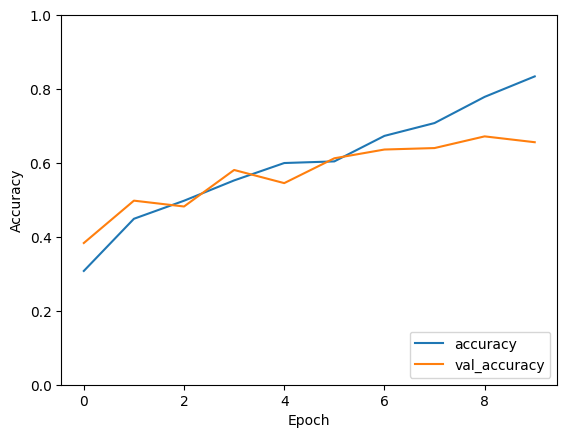

In [ ]:
plt.plot(history_normalization.history['accuracy'], label='accuracy')
plt.plot(history_normalization.history['val_accuracy'], label = 'val_accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.ylim([0, 1])
plt.legend(loc='lower right')

test_loss_normalization, test_acc_normalization = cnn_normalization.evaluate(X_test, y_test, verbose=2)

A very good training and testing score, in an even better time.